1. 【課題1】練習のために特徴量とカテゴリを選択
1. 【問題2】データの分析
1. 【問題2】前処理・学習用データと検証用データの分割
1. 【問題3】前処理・標準化
1. 【問題4】学習と推定
1. 【問題5】評価
1. 【問題6】可視化
1. 【問題7】他の手法の学習
1. 【問題8】（アドバンス課題）各パラメータの意味
1. 【問題8】（アドバンス課題）標準化の有無の比較
1. 【問題9】（アドバンス課題）全ての目的変数を使用して精度が高い手法

## 【課題1】練習のために特徴量とカテゴリを選択


In [1]:
# フォントの設定
import matplotlib as mpl
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)
%matplotlib inline

#計算&表の編集ツール
import pandas as pd
import numpy as np

# 可視化ツール
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager._rebuild()

# 分類するためのツール
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier as Deeplearning

#　その他
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = pd.DataFrame(iris.data, columns=[
     "sepal_length"
    ,"sepal_width"
    ,"petal_length"
    ,"petal_width"
])
y = pd.DataFrame(iris.target, columns = ["species"])  
df = X.join(y)

In [3]:
# 0(=setosa), 1(=versicolor), 2(=virginica) 
# virgicolorとvirginica
df[df['species'].isin(['1', '2'])]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [4]:
# sepal_lengthとpetal_length
df.loc[:,["sepal_length","petal_length"]]

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [5]:
df_virgi = df[df['species'].isin(['1', '2'])].loc[:,["sepal_length","petal_length","species"]]

## 【問題2】データの分析

In [6]:
import seaborn as sns

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

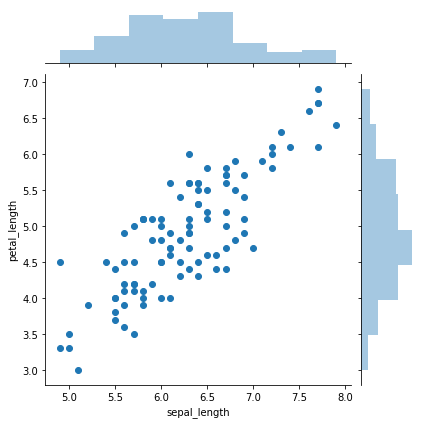

In [7]:
# 散布図
ax = sns.jointplot(x="sepal_length", y="petal_length", data=df_virgi)

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


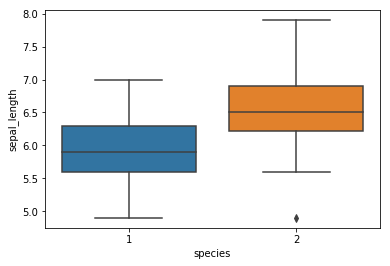

In [8]:
# 箱ひげ図（boxplot）
ax = sns.boxplot(x="species", y="sepal_length", data=df_virgi)

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

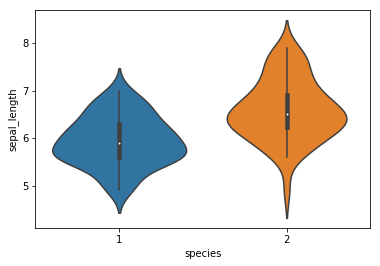

In [9]:
# バイオリン図（violinplot）
ax = sns.violinplot(x="species", y="sepal_length", data=df_virgi)

## 【問題3】前処理・標準化


In [10]:
from sklearn.model_selection import train_test_split

X = df_virgi.loc[:,["sepal_length","petal_length"]]
y = df_virgi.loc[:,["species"]]

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(X_train, y_train)

## 【問題4】学習と推定


In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# 5-nn
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)  
y_pred

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [27]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [13]:
# 1-nn
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train) 
y_pred_1nn = neigh.predict(X_test)  
y_pred_1nn

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

In [14]:
# 3-nn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred_3nn = neigh.predict(X_test)  
y_pred_3nn

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1])

## 【問題5】評価


In [15]:
# accuracy
from sklearn.metrics import accuracy_score
y_true = y_test
accuracy_score(y_true, y_pred)

0.92

In [16]:
# precision
from sklearn.metrics import precision_score
y_true = y_test
precision_score(y_true, y_pred, average='macro')  

0.9285714285714286

In [17]:
# recall
from sklearn.metrics import recall_score
y_true = y_test
recall_score(y_true, y_pred, average='macro')  

0.9230769230769231

In [18]:
# f値
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')  

0.9198717948717948

In [19]:
# 混同行列
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[11,  2],
       [ 0, 12]])

Confusion matrix, without normalization
[[11  2]
 [ 0 12]]
Normalized confusion matrix
[[0.85 0.15]
 [0.   1.  ]]


/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

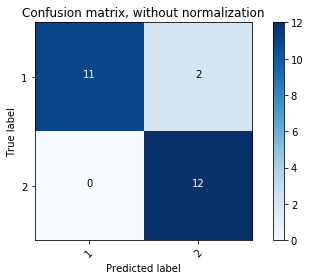

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.d

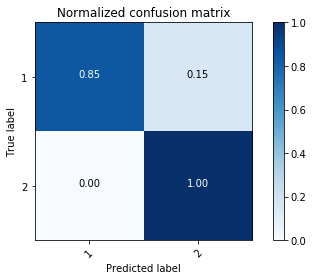

In [20]:
class_names = np.unique(y_pred)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 【問題6】可視化


In [21]:
# create a def for decision region

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', 
                    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), 
                                    np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], 
                    marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [22]:
decision_region(X_train, y_train, neigh)

TypeError: unhashable type: 'slice'

## 【問題7】他の手法の学習


In [23]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(X_train, y_train)

/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9466666666666667

In [24]:
# SVM
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 

print(clf.predict(X_test))


[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train) 
print(clf.predict(X_test))


[1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 1 1]


In [26]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X_train, y_train)

print(clf.feature_importances_)

print(clf.predict(X_test))


[0.35 0.65]
[2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]


/Users/hiroyoshinoro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## 【問題8】（アドバンス課題）各パラメータの意味


## 【問題8】（アドバンス課題）標準化の有無の比較


## 【問題9】（アドバンス課題）全ての目的変数を使用して精度が高い手法